In [9]:
import numpy as np
from easydict import EasyDict
import matplotlib.pyplot as plt

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data.dataloader import DataLoader

import torchvision
import torchvision.transforms as transforms

In [10]:
params=EasyDict()
params.path="/home/hzc/workshop/gitfile/data/cifar10/"

In [4]:
def imgshow(img):
    img= img
    imgn = img.numpy()
    plt.imshow(np.transpose(imgn,(1,2,0)))
    plt.show()

In [5]:
imgTransforms = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))])

In [11]:
trainset = torchvision.datasets.CIFAR10(root=params.path,train=True,transform=imgTransforms,download=False)
testset = torchvision.datasets.CIFAR10(root=params.path,train=False,transform=transforms,download=False)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([3, 32, 32])


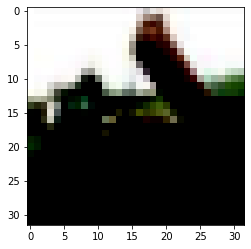

In [12]:
print(trainset[1][0].shape)
imgshow(torchvision.utils.make_grid(trainset[2][0]))

In [13]:
trainLoader = torch.utils.data.DataLoader(trainset,batch_size=32,shuffle=True)
testLoader = torch.utils.data.DataLoader(testset,batch_size=32, shuffle=True)

## Define model

In [14]:
class LeNet(nn.Module):
    def __init__(self):
        super(LeNet, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=6, kernel_size=5)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5)
        self.fc1 = nn.Linear(in_features=5*5*16, out_features=120)
        self.fc2 = nn.Linear(in_features=120, out_features=84)
        self.fc3 = nn.Linear(in_features=84, out_features=10)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool(x)
        x = F.relu(self.conv2(x))
        x = self.pool(x)
        x = x.view(-1, 16*5*5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
        

In [15]:
net = LeNet()

In [16]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(),lr=0.001, momentum=0.9)

In [17]:
for epoch in range(3):
    print("epoch:",epoch)
    lossOfNet = 0.0
    for i,data in enumerate(trainLoader):
        inputs, labels = data
        optimizer.zero_grad()
        output = net(inputs)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        lossOfNet+=loss.item()
        if i%100==99:
            print("ecoch %d, batch %5d, loss: %.3f"%(epoch, i+1, lossOfNet))
            lossOfNet=0.0
print("Train done!")

epoch: 0
ecoch 0, batch   100, loss: 230.502
ecoch 0, batch   200, loss: 230.388
ecoch 0, batch   300, loss: 230.280
ecoch 0, batch   400, loss: 230.337
ecoch 0, batch   500, loss: 230.182
ecoch 0, batch   600, loss: 230.124
ecoch 0, batch   700, loss: 230.130
ecoch 0, batch   800, loss: 230.120
ecoch 0, batch   900, loss: 230.006
ecoch 0, batch  1000, loss: 229.934
ecoch 0, batch  1100, loss: 229.820
ecoch 0, batch  1200, loss: 229.647
ecoch 0, batch  1300, loss: 229.377
ecoch 0, batch  1400, loss: 229.043
ecoch 0, batch  1500, loss: 228.759
epoch: 1
ecoch 1, batch   100, loss: 226.734
ecoch 1, batch   200, loss: 224.804
ecoch 1, batch   300, loss: 220.114
ecoch 1, batch   400, loss: 216.218
ecoch 1, batch   500, loss: 210.108
ecoch 1, batch   600, loss: 208.293
ecoch 1, batch   700, loss: 200.742
ecoch 1, batch   800, loss: 196.822
ecoch 1, batch   900, loss: 196.067
ecoch 1, batch  1000, loss: 194.297
ecoch 1, batch  1100, loss: 189.027
ecoch 1, batch  1200, loss: 188.480
ecoch 1, b

In [20]:
# dataiter = iter(testLoader) who it can not work?
dataiter = iter(trainLoader)
correct=0
total=0

## Predict

In [21]:
with torch.no_grad():
    for data in dataiter:
        images, labels = data
        output = net(images)
        _, predicted = torch.max(output.data, 1)
        total += labels.size(0)
        correct += (predicted==labels).sum().item()

In [22]:
print("accuracy:",correct/total)

accuracy: 0.4394
